In [196]:
import pandas as pd
import networkx as nx
from networkx import set_node_attributes
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from numpy import array
import csv
import folium

In [197]:
#PARTIE 1

In [198]:
#Lire le fichier csv 'transport-nodes.csv'
transport_nodes = pd.read_csv('transport-nodes.csv')
print(transport_nodes)

                  id   latitude  longitude  population
0          Amsterdam  52.379189   4.899431      821752
1            Utrecht  52.092876   5.104480      334176
2           Den Haag  52.078663   4.288788      514861
3          Immingham  53.612390  -0.222190        9642
4          Doncaster  53.522850  -1.131160      302400
5   Hoek van Holland  51.977500   4.133330        9382
6         Felixstowe  51.963750   1.351100       23689
7            Ipswich  52.059170   1.155450      133384
8         Colchester  51.889210   0.904210      104390
9             London  51.509865  -0.118092     8787892
10         Rotterdam  51.922500   4.479170      623652
11             Gouda  52.016670   4.708330       70939


In [199]:

transport_relationships = pd.read_csv("transport-relationships.csv") 
print(transport_relationships)

                 src               dst relationship  cost
0          Amsterdam           Utrecht        EROAD    46
1          Amsterdam          Den Haag        EROAD    59
2           Den Haag         Rotterdam        EROAD    26
3          Amsterdam         Immingham        EROAD   369
4          Immingham         Doncaster        EROAD    74
5          Doncaster            London        EROAD   277
6   Hoek van Holland          Den Haag        EROAD    27
7         Felixstowe  Hoek van Holland        EROAD   207
8            Ipswich        Felixstowe        EROAD    22
9         Colchester           Ipswich        EROAD    32
10            London        Colchester        EROAD   106
11             Gouda         Rotterdam        EROAD    25
12             Gouda           Utrecht        EROAD    35
13          Den Haag             Gouda        EROAD    32
14  Hoek van Holland         Rotterdam        EROAD    33


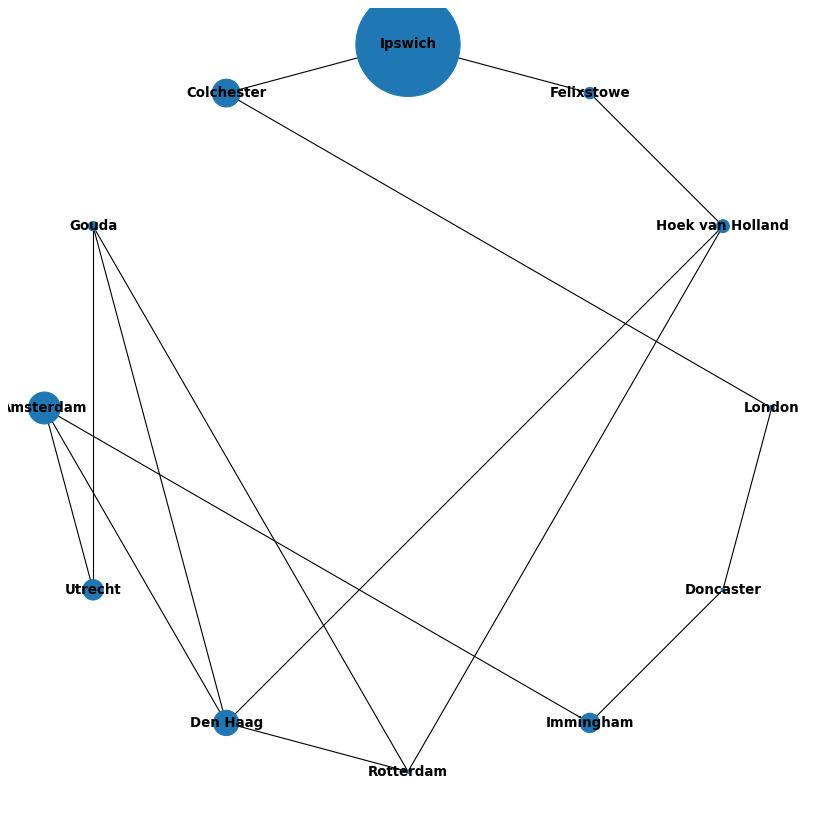

In [218]:
data1=transport_relationships[['src','dst']]
G=nx.Graph()
G=nx.from_pandas_edgelist(data1, 'src', 'dst')
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
nx.draw_shell(G, with_labels=True,node_size=((transport_nodes.population)/1000),font_weight='bold')






    



In [201]:
#Fonction qui ajoute un attribut à chaque noeud du graphe avec set_node_attributes
def ajouterAttribut(myGraphe, dfnode, nameAttr, Index):
    '''ajouter un attribut donné à tous les noeuds d'un graphe'''
    nodes = dfnode[[Index, nameAttr]]
    node_attr = nodes.set_index(Index).to_dict('index')
    nx.set_node_attributes(myGraphe, node_attr)
    
ajouterAttribut(G,transport_nodes, 'latitude', 'id')
ajouterAttribut(G,transport_nodes, 'longitude', 'id')
ajouterAttribut(G, transport_nodes, 'population', 'id')

dict(G.nodes.data())

{'Amsterdam': {'latitude': 52.379189,
  'longitude': 4.899431,
  'population': 821752},
 'Utrecht': {'latitude': 52.092876,
  'longitude': 5.10448,
  'population': 334176},
 'Den Haag': {'latitude': 52.078663,
  'longitude': 4.288788,
  'population': 514861},
 'Rotterdam': {'latitude': 51.9225,
  'longitude': 4.47917,
  'population': 623652},
 'Immingham': {'latitude': 53.61239,
  'longitude': -0.22219,
  'population': 9642},
 'Doncaster': {'latitude': 53.52285,
  'longitude': -1.13116,
  'population': 302400},
 'London': {'latitude': 51.509865,
  'longitude': -0.118092,
  'population': 8787892},
 'Hoek van Holland': {'latitude': 51.9775,
  'longitude': 4.13333,
  'population': 9382},
 'Felixstowe': {'latitude': 51.96375,
  'longitude': 1.3511,
  'population': 23689},
 'Ipswich': {'latitude': 52.05917, 'longitude': 1.15545, 'population': 133384},
 'Colchester': {'latitude': 51.88921,
  'longitude': 0.90421,
  'population': 104390},
 'Gouda': {'latitude': 52.01667, 'longitude': 4.70833,

In [202]:
#Representation des noeuds sur une carte avec folium
for node in G.nodes:
    basemap = folium.Map(location=[G.nodes[node]['latitude'], G.nodes[node]['longitude']], zoom_start=6,tiles="Stamen Toner")

    
    

In [203]:
basemap

In [204]:
#fonction qui ajoute des marqueurs sur la carte avec folium.Marker
def marker(g):
    for i in g.nodes:
        folium.Marker([g.nodes[i]['latitude'],g.nodes[i]['longitude']],zoom_start=20).add_to(basemap)
    return basemap  

    

In [205]:
marker(G)

In [206]:
def construirePointsImage(g):
    points=[]
    for i in g.nodes:
        for neighbor in g.neighbors(i):
            points.append([[g.nodes[i]['latitude'],g.nodes[i]['longitude']],[g.nodes[neighbor]['latitude'],g.nodes[neighbor]['longitude']]])
    return points

In [207]:
coordonneesvoisins = construirePointsImage(G)
print(coordonneesvoisins)


[[[52.379189, 4.899431], [52.092876, 5.10448]], [[52.379189, 4.899431], [52.078663, 4.288788]], [[52.379189, 4.899431], [53.61239, -0.22219]], [[52.092876, 5.10448], [52.379189, 4.899431]], [[52.092876, 5.10448], [52.01667, 4.70833]], [[52.078663, 4.288788], [52.379189, 4.899431]], [[52.078663, 4.288788], [51.9225, 4.47917]], [[52.078663, 4.288788], [51.9775, 4.13333]], [[52.078663, 4.288788], [52.01667, 4.70833]], [[51.9225, 4.47917], [52.078663, 4.288788]], [[51.9225, 4.47917], [52.01667, 4.70833]], [[51.9225, 4.47917], [51.9775, 4.13333]], [[53.61239, -0.22219], [52.379189, 4.899431]], [[53.61239, -0.22219], [53.52285, -1.13116]], [[53.52285, -1.13116], [53.61239, -0.22219]], [[53.52285, -1.13116], [51.509865, -0.118092]], [[51.509865, -0.118092], [53.52285, -1.13116]], [[51.509865, -0.118092], [51.88921, 0.90421]], [[51.9775, 4.13333], [52.078663, 4.288788]], [[51.9775, 4.13333], [51.96375, 1.3511]], [[51.9775, 4.13333], [51.9225, 4.47917]], [[51.96375, 1.3511], [51.9775, 4.13333]]

In [208]:
def visualiserFolium(myGraphe, points, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner', explored = None ):
    '''visualiser les noeuds du graphe avec folium'''
    graph = folium.vector_layers.PolyLine(points, color='red', weight=2, opacity=1).add_to(basemap)
    return graph

In [209]:
visualiserFolium(G, coordonneesvoisins)
basemap

In [210]:
#PARTIE 2

In [211]:
#Creer une class 'Noeud'
class Noeud:
    def __init__(self,nom):
        self.nom = nom
        self.attributs = {}
        self.listeNomVoisin = []
    def setAttribut(self,key,values):
        self.attributs[key] = values
    def getAttribut(self,key):
        return self.attributs[key]
    def getName(self):
        return self.nom
    def egal(self, noeud):
        return self.nom == noeud.getName()
    def getCoutMin(self):
        return self.attributs['coutMin']
    def getCout(self, noeud):
        return self.attributs['cout'][noeud.getName()]
    


In [212]:
class Graphe:
    def __init__(self):
	    self.noeuds = []
	    self.arcs = {}
    def creerNoeuds(self,fichiernoeuds):
        '''creer les noeuds du graphe'''
        with open(fichiernoeuds, 'r') as f:
            for ligne in f:
                ligne = ligne.split(';')
                noeud = Noeud(ligne[0])
                noeud.setAttribut('latitude',ligne[1])
                noeud.setAttribut('longitude',ligne[2])
                noeud.setAttribut('population',ligne[3])
                self.noeuds.append(noeud)
        return self.noeuds
    
    def creerArc(self,fichierarcs):
        '''creer les arcs du graphe'''
        with open(fichierarcs, 'r') as f:
            for ligne in f:
                ligne = ligne.split(';')
                self.arcs[(ligne[0],ligne[1])] = ligne[2]
    def getNoeud(self,nom):
        '''retourne le noeud dont le nom est passé en paramètre'''
        for noeud in self.noeuds:
            if noeud.getName() == nom:
                return noeud
    def getVoisins(self,noeud):
        '''retourne la liste des voisins d'un noeud'''
        voisins = []
        for arc in self.arcs:
            if arc[0] == noeud.getName():
                voisins.append(self.getNoeud(arc[1]))
        return voisins
    def getCoordonnesVoisins(self, noeud):
        '''retourne les coordonnées des voisins d'un noeud'''
        coordonneesvoisins = []
        for voisin in self.getVoisins(noeud):
            coordonneesvoisins.append((voisin.getAttribut('latitude'),voisin.getAttribut('longitude')))
        return coordonneesvoisins
    def getListeCoordonnees(self,listeNoeuds):
        '''retourne les coordonnées des noeuds passés en paramètre'''
        coordonnees = []
        for noeud in listeNoeuds:
            coordonnees.append((noeud.getAttribut('latitude'),noeud.getAttribut('longitude')))
        return coordonnees
    def visualiserFolium(self, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner',explored = None ):
        '''visualiser les noeuds du graphe avec folium'''
        basemap = folium.Map(location=locationpardefaut, zoom_start=12,tiles=tiles)
        for noeud in self.noeuds:
            folium.Marker(noeud.getCoordonnees(), popup=noeud.getName()).add_to(basemap)
        if explored is not None:
            for i in explored:
                folium.Marker(self.noeuds[i].getAttribut('latitude'), self.noeuds[i].getAttribut('longitude'), popup=self.noeuds[i].getName(),).add_to(basemap)
        return basemap


In [213]:
G = Graphe()
G.creerNoeuds('transport-nodes.csv')

IndexError: list index out of range

In [ ]:
G.creerArc('transport-nodes.csv')

IndexError: list index out of range

In [ ]:
G.visualiserFolium()


AttributeError: 'Graph' object has no attribute 'visualiserFolium'

PARTIE 3

In [ ]:
class Pile():
    #     Dernier arrive premier servi : LIFO
    # La classe dispose d'une structure de type list pour ranger les données
    # Les consultations, les insertions, les suppressions se font du même cote

    def __init__(self):
        self.elements = []
    # Insere un objet en tete de la pile

    def push(self, noeud):
        self.elements.append(noeud)

    # Retourne True si un noeud est dans la pile
    def contains_noeud(self, name):
        for element in self.elements:
            if element == name:
                return True
            else:
                return False

# Retourne true si la pile est vide

    def empty(self):
        return len(self.elements) == 0

# Retourne et supprime l'element en tete de pile
# Retourne une exception si la pile est vide

    def remove(self):
        if self.elements:
            return self.elements.pop()


# Test des structures de données Pile et File
f = Pile()
f.push("Mamadou")
f.push("Mansour")
f.push("Dame")
f.push("Khady")
print(f.elements)
f.remove()
# L'élément recemmenet ajouté de la liste sera enlevé
print(f.elements)


class File(Pile):

    # Classe File: voir les definitions ci-dessous
    # Premier arrive premier servi : FIFO
    # La classe dispose d'une structure de type list pour ranger les données
    # Les éléments sont enfilés (insérés) du coté arrière et défilés (retirés) du coté avant
    # File et Pile peuvent partager certaines methodes donc utilisez l'heritagepour definir la classe File.
    # Normalement vous ne devez changer l'implementation d'une seule methode

    def remove(self):
        return self.elements.pop(0)

p=File()
p.push("Mamadou")
p.push("Mansour")
p.push("Dame")
p.push("Khady")
print(p.elements)
p.remove()
#Le premier élément de la liste sera enlevé
print(p.elements)

['Mamadou', 'Mansour', 'Dame', 'Khady']
['Mamadou', 'Mansour', 'Dame']
['Mamadou', 'Mansour', 'Dame', 'Khady']
['Mansour', 'Dame', 'Khady']


PARTIE 4

In [ ]:
from collections import deque

def parcours_dfs(graph, node):

    visiter = []
    stack = deque()
    stack.append(node)

    while stack:
        node = stack.pop()
        if node not in visiter:
            visiter.append(node)
            non_visiter = [n for n in graph[node] if n not in visiter]
            stack.extend(non_visiter)

    return visiter

def iterative_bfs(graph, start):
    visiter = []
    queue = deque()
    queue.append(start)

    while queue:
        node = queue.popleft()
        if node not in visiter:
            visiter.append(node)
            non_visiter = [n for n in graph[node] if n not in visiter]
            queue.extend(non_visiter)

    return visiter

In [ ]:
g = Graphe()
g.visualiserFolium(explored=list(parcours_dfs(g,g.noeuds[0],g.noeuds[1])[0]))

IndexError: list index out of range